<font size="+4">Functions</font><br/>
<font size="+2"> how to get more readable and manutenable code by avoiding spaghetti code</font>

This is a notebook used as 'slides' for the class 5.

---

# Intro: copy-pasting is not a good idea when programming

Let's sum up the first `n` naturals:

In [62]:
sum1 = 0

n = int(input())
rng = range(1,n+1)
for i in rng:
    sum1+=i
print('The sum of the first',n,'naturals',list(rng),'is',sum1)    

 3


The sum of the first 3 naturals [1, 2, 3] is 6


## Classic copy-paste errors

What if we want to do this several times in different parts of a program?
* A bugged version due to __classic copy-paste errors__

In [46]:
#BUGGED VERSION DUE TO CLASSIC COPY-PASTE ERRORS
sum1 = 0

n = int(input())
rng = range(1,n+1)
for i in rng:
    sum1+=i
print('The sum of the first',n,'naturals',list(rng),'is',sum1)


# Do something else ... 
# Do something else ...
# Do something else ...
# Do something else ...
# Do something else ... 
# Do something else ...
# Do something else ...
# Do something else ...
# Do something else ... 
# Do something else ...
# Do something else ...
# Do something else ...
# Do something else ... 
# Do something else ...
# Do something else ...
# Do something else ...


n2 = int(input())
rng = range(1,n+1)
for i in rng:
    sum1+=i
print('The sum of the first',n,'naturals',list(rng),'is',sum1)

 3


The sum of the first 3 naturals [1, 2, 3] is 6


 4


The sum of the first 3 naturals [1, 2, 3] is 12


In [41]:
#FIXED VERSION
sum1 = 0

n = int(input())
rng = range(1,n+1)
for i in rng:
    sum1+=i
print('The sum of the first',n,'naturals',list(rng),'is',sum1)


# Do something else ... 
# Do something else ...
# Do something else ...
# Do something else ...
# Do something else ... 
# Do something else ...
# Do something else ...
# Do something else ...
# Do something else ... 
# Do something else ...
# Do something else ...
# Do something else ...
# Do something else ... 
# Do something else ...
# Do something else ...
# Do something else ...


sum1=0
n2 = int(input())
rng = range(1,n2+1)
for i in rng:
    sum1+=i
print('The sum of the first',n2,'naturals',list(rng),'is',sum1)

 3


The sum of the first 3 naturals [1, 2, 3] is 6


 3


The sum of the first 3 naturals [1, 2, 3] is 6


Imagine doing this in a file with thousands of lines of codes and several copies of the same code
* It would be very error-prone!

Luckily, we can wrap this computation __in a function__
* __Defined__ (written) once
* __Invoked__ (used, called) many times

In [65]:
def sumNaturals(n):
    sum1 = 0
    rng = range(1,n+1)
    for i in rng:
        sum1+=i
    print('The sum of the first',n,'naturals',list(rng),'is',sum1)
    return sum1

sum3 = sumNaturals(3)
sum4 = sumNaturals(4)
print('Twice the sum of the first 4 naturals:',sum4*2)

The sum of the first 3 naturals [1, 2, 3] is 6
The sum of the first 4 naturals [1, 2, 3, 4] is 10
Twice the sum of the first 4 naturals: 20


In [67]:
sumNaturals(int(input()))
sumNaturals(int(input()))

 3


The sum of the first 3 naturals [1, 2, 3] is 6


 4


The sum of the first 4 naturals [1, 2, 3, 4] is 10


10

## Functions increase Modularity and Manutenability

What if we want to update a function?
* Maybe you know that 
<br/>
   $\sum\limits_{i=1}^{n} i = \frac{(n\cdot n+1)}{2}$
* Above we can just __modify the function once__, and all the rest of the code will become aware of the change   

In [55]:
def sumNaturals(n):
    sum1 = int(n*(n+1)/2)
    print('The sum of the first',n,'naturals is',sum1)
    return sum1

# What is a function?

[Functions](https://www.w3schools.com/python/python_functions.asp) (in certain cases called procedures) are a key notion in programming
* Enable the **procedural programming style** mentioned in the first class
  * Break down a big problem into smaller ones
  * Decouple the program logic (what the program does) from the data (what the program manipulates)
  * Therefore increase readability and manutenability of programs

A function consists of a set of statements (or instructions) that 
* have been collected together 
* have been given a name

A bit like in mathematics (e.g. $x1= max(x2,x3)$), functions
* might have arguments ($x_2,x_3$, the __arguments__ or __parameters__)
* execute a number of computations based on the arguments (the statements composing its __body__)
* might return a computed value (the __return value__)

But in programming languages:
* Functions might have side effects 
  * e.g., can depend on the value of variables defined elsewhere

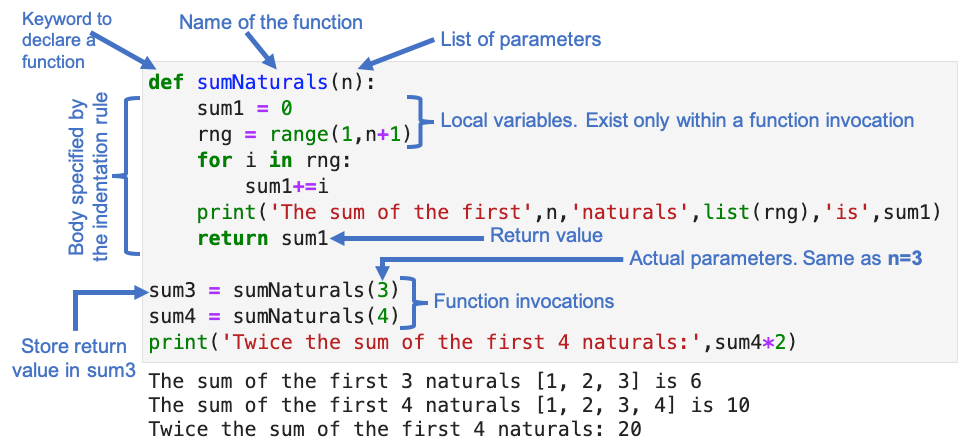

In [139]:
from IPython.display import Image, display
img=Image(filename='images/function.png',width=900)
display(img)

__Aspects to consider when writing a function__
* Each function should have a single purpose
  * Can you describe what it does with a single verb?
  * If a function has more purposes, consider to split it 
* Use self-comment names for arguments
* Do not change mutable arguments (lists, dictionaries, sets) 
  * Unless clearly defined, e.g. in the function name



# Global variables vs Local variables

In [100]:
def sumNaturals(n):
    sum1 = 0
    rng = range(1,n+1)
    lv = 3
    for i in rng:
        sum1+=i
    print('The sum of the first',n,'naturals',list(rng),'is',sum1)
    return sum1

result = sumNaturals(5)
print('Result contains',result)
print('sum1   contains',sum1)
#print(lv) #This gives an error

The sum of the first 5 naturals [1, 2, 3, 4, 5] is 15
Result contains 15
sum1   contains 6


I just told you that local variables are local to each function invocation
* Therefore we get an error (_NameError: name 'lv' is not defined_)
* But then why can I print `sum1`?
* And why do I get a number different than `15`?

> Because I am printing another variable named `sum1`, a __global variable__, that we have declared above
* A __global variable__ does not belong to any function and exists across all code.
  * But cannot be used in functions that define a new variable with same nae
* Everytime we invoke `sumNaturals` we create a new local variable `sum1` which 
  * _shadows_ the global variable `sum1`
  * ceases to exists when the function terminates, making the global variables accessible again.

# Input an output of a function

## Pass by reference

In Python, arguments are passed __by reference__
* For example, if you pass a list lst as argument:
  * The function will not use a copy of lst, but lst itself (possibly through a variable with different name
  * Any modification to the list will be reflected in the code that called the function

Intuitively, you pass a _reference to the list_

> Passing an empty list or a list with 1000 elements has the same cost! <br/>
> You pass just the reference to the 'beggining of the list

In [25]:
def append_to_list(lst):
    lst.append('end')

mylst = ["first","second"]
append_to_list(mylst)
print(mylst)

['first', 'second', 'end']


What happens if you execute the code below?
* More importantly: why?

In [109]:
def append_to_list(lst):
    lst.append('end')
    lst = [1,2]
    print('Inside  the function',lst)

mylst = ["first","second"]
append_to_list(mylst)
print('Outside the function',mylst)

Inside  the function [1, 2]
Outside the function ['first', 'second', 'end']


## We can specify arguments by name

In [113]:
def print_names(name1,name2):
    print(name1,name2)

print_names('Andrea','Diego')
print_names(name1='Andrea',name2='Diego')
print_names(name2='Diego',name1='Andrea')

Andrea Diego
Andrea Diego
Andrea Diego


## We can make arguments optional providing default values

In [116]:
def print_names(name1,name2):
    print(name1,name2)
print_names('Andrea','Diego')
#print_names('Andrea') #Error!

Andrea NoName
Andrea NoName
Andrea NoName2
Andrea Diego
Andrea Diego


In [117]:
def print_names(name1,name2="NoName"):
    print(name1,name2)
print_names('Andrea','Diego')
print_names('Andrea') #That's fine now!

Andrea NoName
Andrea NoName


In [118]:
def print_names(name1="NoName1",name2="NoName2"):
    print(name1,name2)
print_names('Andrea')
print_names(name2='Diego')

Andrea NoName2
NoName1 Diego


## We can specify that we expect _some_ parameters

In [122]:
def print_names(*names):
    for name in names:
        print(name)
    print()
print_names('Andrea')
print_names('Andrea','Diego')
print_names('Andrea','Diego','Matteo')

Andrea

Andrea
Diego

Andrea
Diego
Matteo



## We can specify dictionaries of parameters

In [131]:
def print_names(**params):
    for key, value in params.items():
        print('key is',key,'value is',value)
    print()
print_names(n1 = 'Andrea')
print_names(n1 = 'Andrea' , n2 = 'Diego')
print_names(n1='Andrea',n2='Diego',n3='Matteo')

key is n1 value is Andrea

key is n1 value is Andrea
key is n2 value is Diego

key is n1 value is Andrea
key is n2 value is Diego
key is n3 value is Matteo



## The return value of a function

A function terminates when 
* The last statement in its body is executed
* A `return` statement is executed

In [83]:
def testReturn():
    print('This will be printed')
    return
    print('This will NOT be printed')

testReturn()    

This will be printed


# Everything is an object, even functions

As we discussed in the first class, everything is an object in Python, even functions.

We can
* assign functions to variables
* we can pass functions as arguments to other functions

In [135]:
def my_sum(n1,n2):
    return n1+n2
def my_mul(n1,n2):
    return n1*n2

expr = my_sum
print(expr(1,2))
expr = my_mul
print(expr(1,2))

3
2


In [140]:
def expression_evaluator(f,n1,n2):
    print(f(n1,n2))

expression_evaluator(my_sum,1,2)
expression_evaluator(my_mul,1,2)

3
2


# Functions and libraries

Functions can be seen as 
* an _interface_ or a _contract_

In [ ]:
#Function name and arguments
def sumNaturals(n):
    #Actual computation
    sum1 = 0
    rng = range(1,n+1)
    for i in rng:
        sum1+=i 
    #return computed value
    return sum1

#Function name and arguments
def sumNaturals(n):
    #Actual computation
    sum1 = int(n*(n+1)/2)
    #return computed value
    return sum1

We saw two versions of `sumNaturals`. Both
1. take an argument `n`
2. compute the sum of the first `n` naturals
3. return the computed sum

What changes in the two implementations is how step 2 is implemented
* But developers do not necessarily need to know what precisely happen in poit 2. 
  * They only need to know what to feed in, and what to expect in output
* This allow to abstract te complexity of a program into several smaller problems, possibly solved by others

A __library__ like _matplotlib_ or _csv_ is nothing more than a collection of
* types
* functions
defined in other files

# Lambda functions, map, filter and reduce

## Lambda functions

__[Lambda functions](https://www.w3schools.com/python/python_lambda.asp)__: in some cases, it might be convenient to define on-the-fly anonymous simple functions
* __anonymous__: the function has no name
* __simple__: the function can consist only of one expression

This lambda function computes the sum of two numbers: `lambda a, b: a+b`

In [173]:
my_lfun = lambda a, b: a+b
my_lfun(1,2)

3

In [177]:
def expression_evaluator(f,n1,n2):
    print(f(n1,n2))

expression_evaluator(lambda a, b: a+b, 1,2)

3


A lambda functions is really nothing more than a simple function without name
* Why should we use them then?

There are places where `def` cannot be used:
* In arguments of functions or in return statements

Lambda expression can help you avoiding annoying workarounds

In [190]:
def myfunc(n):
  return lambda a : a * n

mydoubler = myfunc(2)
mytripler = myfunc(3)

print(mydoubler(11))
print(mytripler(11))

22
33


However you can do

In [191]:
def myfunc(n):
    def myinnerfunc(a) : 
        return a * n
    return myinnerfunc

mydoubler2 = myfunc(2)
mytripler2 = myfunc(3)

print(mydoubler(11))
print(mytripler(11))

22
33


Lambda functions are typically used in conjunction with
* __map__: applies a given function to each element in a sequence
* __filter__: applies a Boolean function to each element in a sequence, and returns only those evaluated to `true`
* __reduce__: applies cumulatively a given function to the elements in a sequence, and return the cumulative result

Notes:
* In the examples below we will define functions. But any Python function can be used, even built-in ones.
* In the examples below, the functions take 1 parameter. If the considered functions have 2, 3, or more parameters, you just have to provide 2, 3, or more lists.

Some examples have been taken from the two following links, where interesting discussions on lambdas, map, filter, and reduce can be found:
* [Source 1](https://book.pythontips.com/en/latest/map_filter.html#map-filter-and-reduce)
* [Source 2](https://www.learnpython.org/en/Map,_Filter,_Reduce)

## Map

In [23]:
items = [1, 2, 3, 4, 5]

#Using a loop
squared = []
for i in items:
    squared.append(i**2)
print(squared)
    
#Can be expressed more compactly using maps
squared = list(map(lambda x: x**2, items))
print(squared)

#The same you can do with list comprehensions
squared = [x**2 for x in items]
print(squared)

[1, 4, 9, 16, 25]
[1, 4, 9, 16, 25]
[1, 4, 9, 16, 25]


You can even have list of functions rather than a list of values

In [20]:
def multiply(x):
    return (x*x)
def add(x):
    return (x+x)

funcs = [multiply, add]
for i in range(5):
    value = list(map(lambda x: x(i), funcs))
    print(value)

[0, 0]
[1, 2]
[4, 4]
[9, 6]
[16, 8]


Another example using a built-in function

In [22]:
names = ['andrea','daniele']
capitalized_names = list(map(str.capitalize,names))
print(capitalized_names)

['Andrea', 'Daniele']


## Filter

In [3]:
items = [1, 2, 3, 4, 5]

#Using a loop
odd_numbers = []
for i in items:
    if i%2 !=0 :
        odd_numbers.append(i)
print(odd_numbers)

#Can be expressed more compactly using maps
odd_numbers = list(filter(lambda x: x%2 != 0, items))
print(odd_numbers)

#The same you can do with list comprehensions
odd_numbers = [x for x in items if x%2 !=0]
print(odd_numbers)

[1, 3, 5]
[1, 3, 5]
[1, 3, 5]


## Reduce

In [17]:
items = [1, 2, 3, 4, 5]

#Using a loop
tot_sum = 0
for i in items:
    tot_sum += i
print(tot_sum)

#Can be expressed more compactly using maps
from functools import reduce
tot_sum = reduce(lambda x, y: x + y, items)
print(tot_sum)

#The result is not a list but a number, therefore you can't use comprehensions

15
15


Reduce works as follow:
* Initially, `x` and `y` are the first and second element of the list, resp
* In every following step, `x` is cumulative value computed so far, while `y` is the next element in the list

Of course you can combine all map, filter and reduce

In [18]:
items = [1, 2, 3, 4, 5]

squared = map(lambda x: x**2, items)
squared_smaller_than_ten = filter(lambda x: x<10, squared)
sum_of_squared_smaller_than_ten = reduce(lambda x, y: x + y, squared_smaller_than_ten)
print(sum_of_squared_smaller_than_ten)

#Can be expressed in one go
sum_of_squared_smaller_than_ten = reduce(lambda x, y: x + y,filter(lambda x: x < 10, map(lambda x: x**2, items)))
print(sum_of_squared_smaller_than_ten)

14
14


## A closing note on map, filter and reduce

* These are notions typical of so-called _functional programming languages_
  * Languages somehow close to the mathematical language/mathematical way of thinking, 
  * Everything is a function, and computation evolves by evaluating the correct functions
* They don't enrich the expressive power of Python
  * But they allow you to write more compact code avoiding loops and if.
* They became mainstream (supported e.g. in Java or .NET languages) about 5/10 years ago

My personal opinion:
* These are advanced programming features that you might not need (and might not understand :D ) as comprehensions should be enough for most of your problems
* Performance-wise, they are not so different.
* Nevertheless, you might encounter them when googling for a solution for a problem
* Therefore you should know them, while I suggest you to use comprehensions whenever possible